### 方法:
1.正则化；
2.集成模型；
3.寻找最优超参数:XBGrid - 也可以用以下的方法
4.寻找最优参数： 粒子度算法/遗传算法 - 启发式优化算法
5.进行评估 - 可视化训练过程




文件处理 - 标准化 - 集成模型进行分析/ 正则化处理 - 交叉验证超参数 / 超参数优化 -评估

### Import Package

In [9]:

import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
import xgboost as xgb

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, r2_score, make_scorer

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,confusion_matrix
import seaborn as sns

### Read the file Date

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(['id','target'],axis=1).values
Y_train = train['target']
test = test.drop(['id'], axis=1).values

### Pre-Process the Data

In [3]:
#Full feature scaling processing to increase the robustness of the original data

Total_Data = np.concatenate((X_train , test), axis=0)
Scaled_Data = RobustScaler().fit_transform(Total_Data)
X_train = Scaled_Data[:250]
test = Scaled_Data[250:]

r2_threshold = 0.16
random_seed = 563
noise = 0.01
np.random.seed(random_seed)

# add a bit of noise to train_X to reduce overfitting
X_train += np.random.normal(0, noise, X_train.shape)

### Model Part

In [4]:
## Model building
#Elastic Network
model = ElasticNet(alpha=0.031, tol=0.01,l1_ratio = 0.7, random_state=random_seed, selection='random')

#LogisticRegression
#model = LogisticRegression(random_state=42)

#BayesianRidge
#model = BayesianRidge()

#Ridge
#model = Ridge()

#XGB - Boosting
#model= xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)



## Parament Searching
#Elastic Network

param_grid = {
    'alpha' : [0.019, 0.022, 0.021, 0.02, 0.023, 0.024, 0.025, 0.026],
    'tol'   : [0.0012, 0.0013, 0.0014, 0.001, 0.0015, 0.0016],
    'l1_ratio': [0.8,1],
}

'''
#LogisticRegression
param_grid = {'class_weight' : ['balanced', None], 
              'penalty' : ['l2','l1'], 
              'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['saga']}


#BayesianRidge
param_grid = {
    'n_iter': [300, 500],
    'alpha_1': [1e-6],
    'alpha_2': [1e-6],
    'lambda_1': [1e-6,],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

#Ridge
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

#XGB - Boosting
param_grid = {
    'n_estimators': [1000],
    'learning_rate': [0.005],
    'max_depth': [2],
    'min_child_weight': [10],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}
'''

#define the Scoler if there is one data then set it to 0.5
def scoring_roc_auc(y, y_pred):
    try:
        return roc_auc_score(y, y_pred)
    except:
        return 0.5


robust_roc_auc = make_scorer(scoring_roc_auc)

# define recursive elimination feature selector
feature_selector = RFECV(model, min_features_to_select=12, scoring=robust_roc_auc, step=10, verbose=0, cv=30, n_jobs=-1)

predictions = pd.DataFrame()
counter = 0


miss
best parament : {'alpha': 0.024, 'l1_ratio': 1, 'tol': 0.0012}
r2_in_val:  0.10263954809329146
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.11650713305570615
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.12355178276666201
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.08108154081503127
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.06338732436306016
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  -0.0554298430306277
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.09171912063919219
ok


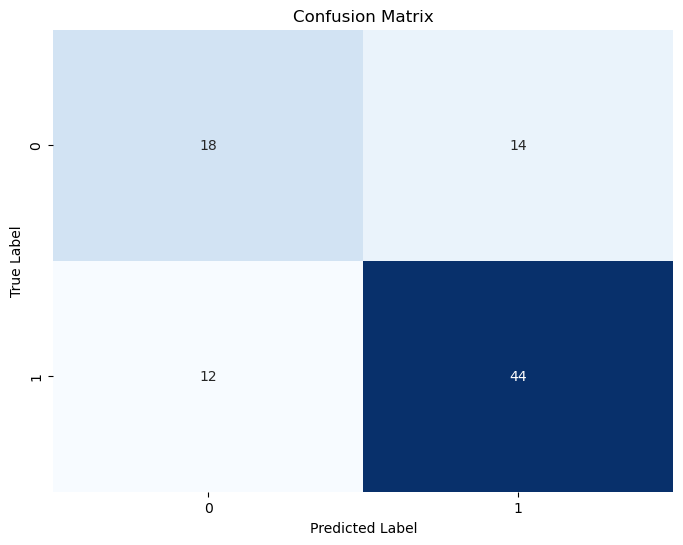

best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.17886018364446954
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.15750400897679961
miss
best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  -0.004736823064278806
ok


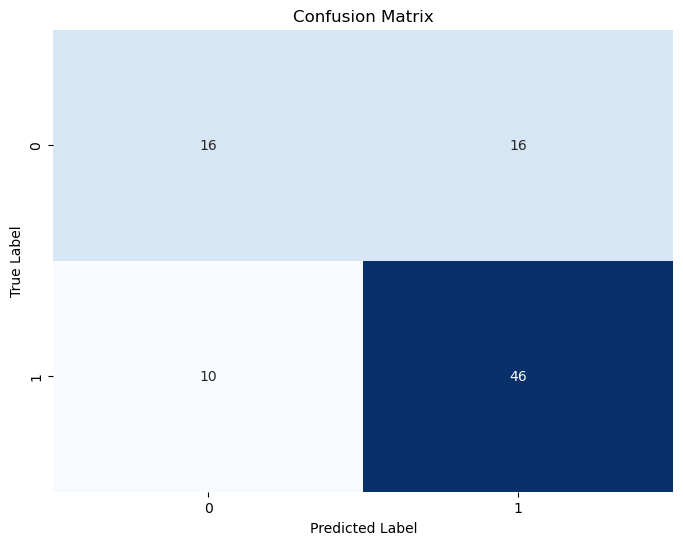

best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.23947223182424626
ok


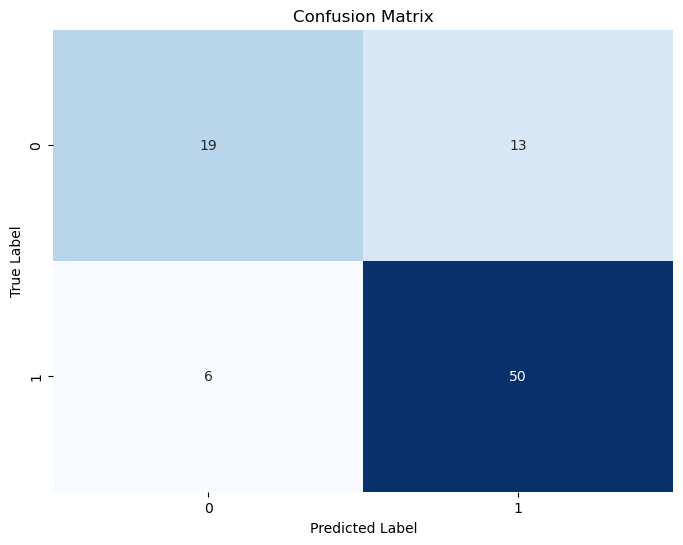

best parament : {'alpha': 0.019, 'l1_ratio': 0.8, 'tol': 0.0012}
r2_in_val:  0.2953544264995739


In [12]:

for train_id, val_id in StratifiedShuffleSplit(n_splits=12, test_size=0.35, random_state=random_seed).split(X_train,Y_train):
    '''
    we splite the train data into (train + validation)datatset , and loop to find the best model 
    val: validation
    '''
    X_in_trian = X_train[train_id]
    Y_in_train = Y_train[train_id]

    X_in_val = X_train[val_id]
    Y_in_val = Y_train[val_id]

    #get best features 
    feature_selector.fit(X_in_trian,Y_in_train)
    #delete the low importance features
    X_featured_train = feature_selector.transform(X_in_trian)
    X_featured_val = feature_selector.transform(X_in_val)

    test_featured = feature_selector.transform(test)

    #grid search to find the best model
    grid_search =GridSearchCV(feature_selector.estimator_, param_grid=param_grid,verbose=0, n_jobs=1,scoring=robust_roc_auc,cv= 30)
    grid_search.fit(X_featured_train,Y_in_train)

    #get the prediction in validation set
    Y_in_val_pred = grid_search.best_estimator_.predict(X_featured_val)

    #give the scoring:
    #val_roc = roc_auc_score(Y_in_val, Y_in_val_pred)
    r2_in_val = r2_score(Y_in_val,Y_in_val_pred)

    if r2_in_val > r2_threshold:
        predicton = grid_search.best_estimator_.predict(test_featured)
        predictions =pd.concat([predictions,pd.DataFrame(predicton)],axis=1)
        print("ok")


    
        
    else:
        print("miss")
 

    print(f"best parament : {grid_search.best_params_}" )
    print("r2_in_val: ", r2_in_val)
    counter += 1


### Generate the Submission

In [20]:

# write the dataframe to submission.cvs
#get the combined result of the data set 
final_pred = pd.DataFrame(predictions.mean(axis=1))
final_pred.index += 250
final_pred.columns = ['target']
final_pred.to_csv('submission.csv', index_label='id', index=True)   

print(predictions.head(150))
print(final_pred.head(150))

            0         0         0
0    0.729835  0.511822  0.636262
1    0.875947  0.587527  0.785501
2    0.625850  0.701257  0.593265
3    0.845082  1.180122  0.807329
4    0.701232  0.686398  0.714297
..        ...       ...       ...
145  0.817357  0.592231  0.731909
146  0.544835  0.438415  0.417946
147  0.161141  0.725569  0.529290
148  0.593401  0.580783  0.887274
149  0.832749  0.582688  0.727526

[150 rows x 3 columns]
       target
250  0.625973
251  0.749659
252  0.640124
253  0.944178
254  0.700642
..        ...
395  0.713832
396  0.467065
397  0.472000
398  0.687153
399  0.714321

[150 rows x 1 columns]


### Visualization

In [ ]:
'''        

        #Comparison of Predicted and Actual Values
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(Y_in_val)), Y_in_val, color='blue', label='Actual')
        plt.scatter(range(len(Y_in_val_pred)), Y_in_val_pred, color='red', label='Predicted', alpha=0.5)
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Sample Index')
        plt.ylabel('Target Value')
        plt.legend()
        plt.show()

        ------------------------------------------------------


        #ROC Curve
        fpr, tpr, thresholds = roc_curve(Y_in_val, Y_in_val_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 7))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()


        ------------------------------------------------------


        #feature importance
        feature_importance = feature_selector.estimator_.coef_
        sorted_idx = np.argsort(np.abs(feature_importance))[::-1]

        non_zero_features = sorted_idx[feature_importance[sorted_idx] != 0]
        non_zero_importance = feature_importance[non_zero_features]
        non_zero_names = X_featured_train[non_zero_features]

        plt.figure(figsize=(10, 6))
        plt.title("Feature Importance")
        plt.bar(range(len(non_zero_importance)), non_zero_importance, align='center')
        plt.xticks(range(len(non_zero_importance)), non_zero_names, rotation=90)
        plt.show()    

        
        ------------------------------------------------------

        #Confusion Matrix
        binary_prediction = np.where(Y_in_val_pred >= 0.5, 1, 0)
        cm = confusion_matrix(Y_in_val, binary_prediction)
       
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
'''